In [ ]:
#Question 1
#Binary Classification between 2 and 6

In [ ]:
#Importing required libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
mnist = tf.keras.datasets.mnist #loaded data

In [ ]:
#Step 1: Loading and Prepocessing data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data() #All numbers from 0 to 9
index_train = np.where((train_labels == 2) | (train_labels == 6)) #index of 2 digit and 6 digit which are 3 and 5 in training data (as indexing starts from 0)
index_test = np.where((test_labels == 2) | (test_labels == 6)) #index of 2 digit and 6 digit which are 3 and 5 in test data (as indexing starts from 0)

In [ ]:
#Extraction training images for 2 and 6
train_images_26 = train_images[index_train]
train_images_26 = train_images_26.reshape((len(train_images_26), train_images_26[1].size))
train_labels_26 = train_labels[index_train].astype('int')

In [ ]:
#Extraction test images for 2 and 6
test_images_26 = test_images[index_test]
test_images_26 = test_images_26.reshape((len(test_images_26), test_images_26[1].size))
test_labels_26 = test_labels[index_test].astype('int')

In [ ]:
#Changing labels from 2 to -1 and 6 to 1
train_labels_26[np.where(train_labels_26 == 2)] = -1
train_labels_26[np.where(train_labels_26 == 6)] = 1
test_labels_26[np.where(test_labels_26 == 2)] = -1
test_labels_26[np.where(test_labels_26 == 6)] = 1


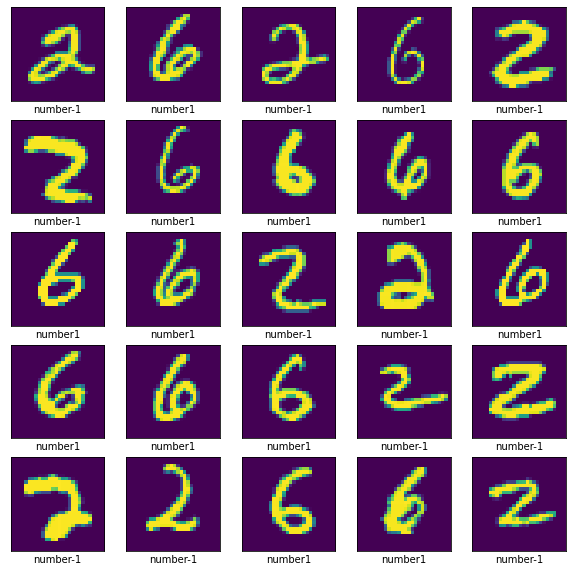

In [ ]:
#Displaying first 25 training data
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(train_images_26[i].reshape((28,28)),)
  plt.xlabel('number' + str(train_labels_26[i]))
plt.show()

In [ ]:
#Inserting dummy feature in 1 in training and test images
train_images_26_w_dummy = np.insert(train_images_26, 784,1, axis=1)/255
test_images_26_w_dummy = np.insert(test_images_26, 784,1, axis=1)/255
train_images_26_w_dummy = train_images_26_w_dummy[range(1000)]
train_labels_26_w_dummy = train_labels_26[range(1000)]

In [98]:
#Perceptron Algorithm 
# a) Stopping criteria: 95% of the training data correctly classified
w = np.ones((785,1)) #includes the dummy feature
train_set_size = train_labels_26_w_dummy.shape[0] #Number of Training Samples

x = np.transpose(train_images_26_w_dummy)
y = np.transpose(train_labels_26_w_dummy)

for j in range(train_set_size):
  loss = 0

  xj = train_images_26_w_dummy[j][:].reshape(785,1) #each xi sample of size (785, 1)
  yj = train_labels_26_w_dummy[j] #y label which is either -1 or 1
  wTxj = np.dot(np.transpose(w), xj) #Finding wTx values for each sample
  
  # #Activation function 
  #Using sign(x) function: 
  # { 1 for x >= 0}
  # {-1 for x < 0}

  if wTxj >= 0:
    y_pred = 1
  else:
    y_pred = -1
  
  # Weight updation
  if yj*y_pred<=0:
    w = w + 0.1*xj*yj #updating w whenever predicted label is not actual label

  #Error calculation on Training set
  WTxvalues = np.dot(np.transpose(w), x) #Calculating wTx for all training samples
  y_predvalues = [1 if x >= 0 else -1 for x in WTxvalues[0]] #Predicted y labels for all training samples

  yvalues = y*y_predvalues
  for val in yvalues: #Removing the dummy feature
    if val < 0: #misclassified labels
      loss += 1 #increasing loss value whenever a misclassified label is encountered
  

  #Error calculation
  error = (1/train_set_size)*loss
  accuracy = (1-error)*100
  
  #Stopping criteria for 95% data correctly classified
  if error <= 0.05:
    print("Accuracy of 95% is achieved")
    print("Training error: {}, Accuracy: {}%".format(error, accuracy))
    break

Accuracy of 95% is achieved
Training error: 0.048, Accuracy: 95.19999999999999%


In [ ]:
#Calculating accuracy on Test set
test_set_size = test_labels_26.shape[0] #Number of Test Samples
loss = 0
for i in range(test_set_size):
    x = test_images_26_w_dummy[i][:].reshape(785,1) #each xi sample of size (785, 1)
    y = test_labels_26[i] #Actual y-label
    wTx = np.dot(np.transpose(w), x)

    # Activation function
    if wTx >= 0:
      y_pred = 1
    else:
      y_pred = -1

    #Loss calculation
    if y*y_pred<=0:
      loss += 1 ##increasing loss value whenever a misclassified label is encountered

error = (1/test_set_size)*loss
accuracy = (1-error)*100
print("Test error: {}, Accuracy: {}%".format(error, accuracy))

Test error: 0.06180904522613066, Accuracy: 93.81909547738694%


In [96]:
#Perceptron Algorithm 
# b) Stopping criteria: 80% of the training data correctly classified

w = np.ones((785,1)) #includes the dummy feature
train_set_size = train_labels_26_w_dummy.shape[0] #Number of Training Samples

x = np.transpose(train_images_26_w_dummy)
y = np.transpose(train_labels_26_w_dummy)

for j in range(train_set_size):
  loss = 0

  xj = train_images_26_w_dummy[j][:].reshape(785,1) #each xi sample of size (785, 1)
  yj = train_labels_26_w_dummy[j] #y label which is either -1 or 1
  wTxj = np.dot(np.transpose(w), xj) #Finding wTx values for each sample
  
  #Activation function 
  #Using sign(x) function: 
  # { 1 for x >= 0}
  # {-1 for x < 0}

  if wTxj >= 0:
    y_pred = 1
  else:
    y_pred = -1

  
  # Weight updation
  if yj*y_pred<=0:
    w = w + 0.1*xj*yj #updating w whenever predicted label is not actual label

  #Error calculation on Training set
  WTxvalues = np.dot(np.transpose(w), x) #Calculating wTx for all training samples
  y_predvalues = [1 if x >= 0 else -1 for x in WTxvalues[0]] #Predicted y labels for all training samples

  yvalues = y*y_predvalues
  for val in yvalues: #Removing the dummy feature
    if val < 0: #misclassified labels
      loss += 1 #increasing loss value whenever a misclassified label is encountered
  

  #Error calculation
  error = (1/train_set_size)*loss
  accuracy = (1-error)*100
  
  #Stopping criteria for 80% data correctly classified
  if error <= 0.2:
    print("Accuracy of 80% is achieved")
    print("Training error: {}, Accuracy: {}%".format(error, accuracy))
    break

Accuracy of 80% is achieved
Training error: 0.199, Accuracy: 80.1%


In [ ]:
#Calculating error on Test set
test_set_size = test_labels_26.shape[0]
loss = 0
for i in range(test_set_size):
    x = test_images_26_w_dummy[i][:].reshape(785,1)
    y = test_labels_26[i]
    wTx = np.dot(np.transpose(w), x)

    # Activation function
    if wTx >= 0:
      y_pred = 1
    else:
      y_pred = -1

    #Loss calculation
    if y*y_pred<= 0:
      loss += 1

error = (1/test_set_size)*loss
accuracy = (1-error)*100
print("Test error: {}, Accuracy: {}%".format(error, accuracy))

Test error: 0.2005025125628141, Accuracy: 79.94974874371859%


In [ ]:
#Question 2: 
#K-nearest neighbor algorithm

In [ ]:
#for k = [1,3,5]
#Training set
kvalues = [1,3,5]
for k in kvalues: #Iterating over different k values
  loss = 0
  for i in range(train_set_size): #Calculating Euclieden distance values for each sample of training data
    distance = []
    x = train_images_26_w_dummy[i][:].reshape(785,1)
    y = train_labels_26_w_dummy[i]
    for j in range(train_set_size): #Calculating Euclieden distance from each sample of training data to every sample of training data
        x1 = train_images_26_w_dummy[j][:].reshape(785,1)
        d = np.linalg.norm(x-x1) #Calculating the euclidean distance
        distance.append(d)

    sorteddistance = list(np.argsort(distance)) #Sorting the distance in ascending order

    if k == 1: #for k = 1
      y_pred = train_labels_26_w_dummy[sorteddistance[0]] #Using only first minimum sample from sorted distances

    if k == 3: #for K = 3
      ylabels = []
      for i in range(3): #Using first 3 minimum distance samples from sorted distances
        ylabels.append(train_labels_26_w_dummy[sorteddistance[i]])
      y_pred = max(ylabels, key = ylabels.count)

    if k == 5: #for K = 5
      ylabels = []
      for i in range(5):#Using first 5 minimum distance samples from sorted distances
        ylabels.append(train_labels_26_w_dummy[sorteddistance[i]])
      y_pred = max(ylabels, key = ylabels.count)

    #Loss function
    if y != y_pred:
        loss += 1 #increasing loss value whenever a misclassified label is encountered

  error = (1/train_set_size)*loss
  accuracy = (1-error)*100
  print("K: {}, Training error: {}".format(k, error))
print("\n ")

#K-nearest neighbor algorithm
#Test set
for k in kvalues:
  loss = 0
  for i in range(test_set_size): #Calculating Euclieden distance values for each sample of test data
    distance = []
    x = test_images_26_w_dummy[i][:].reshape(785,1)
    y = test_labels_26[i]
    for j in range(train_set_size):
        x1 = train_images_26_w_dummy[j][:].reshape(785,1)
        d = np.linalg.norm(x-x1) #Calculating the euclidean distance
        distance.append(d)

    sorteddistance = list(np.argsort(distance)) #Sorting the distance in ascending order

    if k == 1: #for k = 1 #First minimum distances from training samples
      y_pred = train_labels_26_w_dummy[sorteddistance[0]] #Getting the y-label of closest neighbour

    if k == 3: #for K = 3 #First 3 minimum distances from training samples
      ylabels = []
      for i in range(3):
        ylabels.append(train_labels_26_w_dummy[sorteddistance[i]]) #y labels of 3 training samples
      y_pred = max(ylabels, key = ylabels.count) #Getting the maximum repeated y-label of closest 3 neighbours

    if k == 5: #for K = 5 #First 5 minimum distances from training samples
      ylabels = []
      for i in range(5):
        ylabels.append(train_labels_26_w_dummy[sorteddistance[i]]) #y labels of 5 training samples
      y_pred = max(ylabels, key = ylabels.count)#Getting the maximum repeated y-label of closest 5 neighbours

    #Loss function
    if y != y_pred:
        loss += 1 #increasing loss value whenever a misclassified label is encountered

  error = (1/test_set_size)*loss
  accuracy = (1-error)*100
  print("K: {}, Test error: {}".format(k, error))

K: 1, Training error: 0.0
K: 3, Training error: 0.002
K: 5, Training error: 0.006

 
K: 1, Test error: 0.007537688442211056
K: 3, Test error: 0.006030150753768845
K: 5, Test error: 0.007035175879396985
